# Titanic Data Investigation

## Main Question: What affected passengers' survival rate?

Using the Titanic data, I would like to investigate what sort of people were likely to survive through this incident. Breaking down the main question, "what affected passengers' survival rate?", into three more specific questions; "which gender had higher survival opportinity?", "was there any correlation between age and survival rate?" and "was there any correlation between fare and survival rate?", I would like to answer them one by one. 

## Table of Contents
###   - 0. Data Wrangling
###   - 1. Question 1
###   - 2. Question 2
###   - 3. Question 3
###   - 4. Conclusion

## 0. Data Wrangling

Before starting the data analysis, I would go through following three steps as a preparation.
- identify the missing values
- change the data type
- transform the given data into data frame

In [92]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import unicodecsv as csv
from scipy import stats
import seaborn as sns

In [93]:
# Load titanic data from csv

def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = csv.DictReader(f)
        return list(reader)

titanic = read_csv('P3Project_Datasets/titanic-data.csv')

In [94]:
# If i is empty, return none. else return an int
def parse_maybe_int(i):
#    if i == '':
#        return None
#        print("hi there is an ''.") # To test if the empty string loop in here
#    else:
        try:
            return int(i)
        except:
            None
            
def parse_maybe_float(i):
        try:
            return float(i)
        except:
            None


# Clean up the data types in the titanic table
for titanic2 in titanic:
    titanic2['Age'] = parse_maybe_int(titanic2['Age'])
    titanic2['Fare'] = parse_maybe_float(titanic2['Fare'])
    titanic2['Parch'] = parse_maybe_int(titanic2['Parch'])
    titanic2['Pclass'] = parse_maybe_int(titanic2['Pclass'])
    titanic2['SibSp'] = parse_maybe_int(titanic2['SibSp'])
    titanic2['Survived'] = parse_maybe_int(titanic2['Survived'])
    
titanic[0]

{u'Age': 22,
 u'Cabin': u'',
 u'Embarked': u'S',
 u'Fare': 7.25,
 u'Name': u'Braund, Mr. Owen Harris',
 u'Parch': 0,
 u'PassengerId': u'1',
 u'Pclass': 3,
 u'Sex': u'male',
 u'SibSp': 1,
 u'Survived': 0,
 u'Ticket': u'A/5 21171'}

In [95]:
# Convert to Data Frame
titanic_df = pd.DataFrame(titanic)

In [96]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Age            689 non-null float64
Cabin          891 non-null object
Embarked       891 non-null object
Fare           891 non-null float64
Name           891 non-null object
Parch          891 non-null int64
PassengerId    891 non-null object
Pclass         891 non-null int64
Sex            891 non-null object
SibSp          891 non-null int64
Survived       891 non-null int64
Ticket         891 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [97]:
titanic_df

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1,PC 17599
2,26.0,,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1,113803
4,35.0,,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0,373450
5,NaN,,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0,17463
7,2.0,,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0,349909
8,27.0,,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1,347742
9,14.0,,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1,237736


In [98]:
# replace missing value with mean value of age, beacuse missing vlues are assumed to be distributed similarly to the values that present.

titanic_df['Age'] = titanic_df['Age'].replace(np.NaN, np.mean(titanic_df['Age']))

In [99]:
survived = titanic_df['Survived']
age = titanic_df['Age']
fare = titanic_df['Fare']
parch = titanic_df['Parch']
pclass = titanic_df['Pclass']
sibsp = titanic_df['SibSp']

## 1. Question 1

First, I would like to answer this question; "which gender had higher survival opportinity?".

### To visualize the propotion of the genders between survived and non-servived groups in 2x2 contigency table

In [100]:
# draw 2x2 contigency table

pd.crosstab(titanic_df.Survived, titanic_df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [101]:
# calcurate odds ration and p value

oddsratio, pvalue = stats.fisher_exact([[81, 468], [233, 109]])
print 'Odds Ratio is', oddsratio
print 'pvalue is', pvalue, '(p value<.00001), very significant that a female has better chance to survive than a male.'

Odds Ratio is 0.0809673159459
pvalue is 6.46392156458e-60 (p value<.00001), very significant that a female has better chance to survive than a male.


### Answer 1. Female was likely to have better chance to survive than male

## 2. Question 2

At this section, I would like to answer to the second question, "was there any correlation between age and survival rate?".

In [102]:
# Check out the Median, 25%, 75% and Mean age / fare for both Survivals vs Non-survivals specifically

titanic_df.describe()

,Age,Fare,Parch,Pclass,SibSp,Survived
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.847605,32.204208,0.381594,2.308642,0.523008,0.383838
std,12.588429,49.693429,0.806057,0.836071,1.102743,0.486592
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,23.000000,7.910400,0.000000,2.000000,0.000000,0.000000
50%,29.847605,14.454200,0.000000,3.000000,0.000000,0.000000
75%,35.000000,31.000000,0.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,3.000000,8.000000,1.000000


In [103]:
# devide given data into two: those survived(x) and those non-survived(x1)
# describe the median, 25%, 75%, mean and etc. for each group

df_Survived = titanic_df[titanic_df.Survived==1]
x = df_Survived['Age'].dropna()
print('Stats for age for survivals')
print(x.describe())
print('\n')

df_xSurvived = titanic_df[titanic_df.Survived==0]
x1 = df_xSurvived['Age'].dropna()
print('Stats for age for non-survivals')
print(x1.describe())

Stats for age for survivals
count    342.000000
mean      29.160399
std       13.171139
min        1.000000
25%       22.000000
50%       29.847605
75%       35.000000
max       80.000000
Name: Age, dtype: float64


Stats for age for non-survivals
count    549.000000
mean      30.275701
std       12.204056
min        1.000000
25%       23.000000
50%       29.847605
75%       34.000000
max       74.000000
Name: Age, dtype: float64


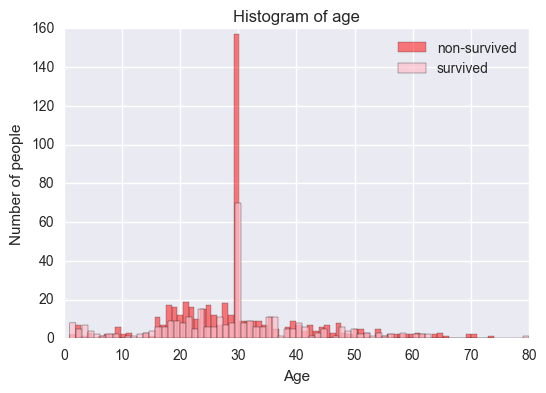

In [104]:
# draw graphs to show age distributions for both survivals and non-survivals

%matplotlib inline
plt.hist(x1, bins=75, alpha=0.5, color= 'r', label = 'non-survived')
plt.hist(x, bins=75, alpha=0.7, color= 'pink', label = 'survived')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.title('Histogram of age')
plt.legend()


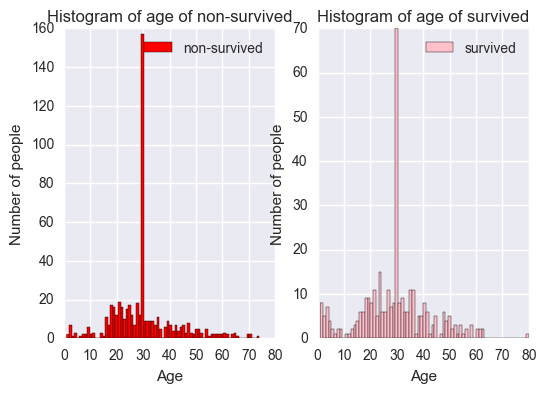

In [105]:
# draw graphs to show age distributions for both survivals and non-survivals separately

fig, axs = plt.subplots(1,2)
axs[0].hist(x1, bins=75, color= 'r')
axs[0].legend(['non-survived'])
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Number of people')
axs[0].set_title('Histogram of age of non-survived')

axs[1].hist(x, bins=75, color= 'pink')
axs[1].legend(['survived'])
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Number of people')
axs[1].set_title('Histogram of age of survived')

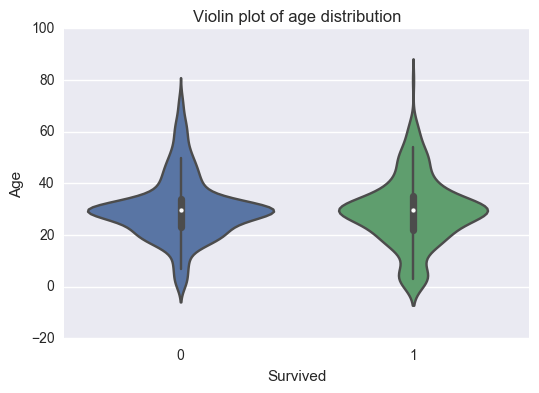

In [106]:
# draw violin plot for easier comparison

g = sns.violinplot( x=titanic_df["Survived"], y=titanic_df["Age"])
sns.plt.title('Violin plot of age distribution')

In [114]:
# Mann-Whitney U test to compare age distribution of survival vs non-survival

print(stats.mannwhitneyu(x, x1))
print('pvalue = .314 (more than .05). So it is true that there is no signficant difference.')

MannwhitneyuResult(statistic=92077.5, pvalue=0.31383998252140555)
pvalue = .314 (more than .05). So it is true that there is no signficant difference.


### Answer 2. Age doesn't affect the survival rate.
Although there seems to be difference in survival rate for those below 10 years old according to the violin plot, I don't investigate further here. To reveal what made differnce for those below 10 years old, we need more information.

## 3. Question 3

At this section, I would try to answer the last question;"was there any correlation between fare and survival rate?".

In [115]:
# devide given data into two: those survived(x) and those non-survived(x1)
# describe the median, 25%, 75%, mean and etc. for each group

df_Survived = titanic_df[titanic_df.Survived==1]
x2 = df_Survived['Fare'].dropna()
print('Stats for fare for survivals')
print(x2.describe())
print('\n')

df_xSurvived = titanic_df[titanic_df.Survived==0]
x3 = df_xSurvived['Fare'].dropna()
print('Stats for fare for non-survivals')
print(x3.describe())

Stats for fare for survivals
count    342.000000
mean      48.395408
std       66.596998
min        0.000000
25%       12.475000
50%       26.000000
75%       57.000000
max      512.329200
Name: Fare, dtype: float64


Stats for fare for non-survivals
count    549.000000
mean      22.117887
std       31.388207
min        0.000000
25%        7.854200
50%       10.500000
75%       26.000000
max      263.000000
Name: Fare, dtype: float64


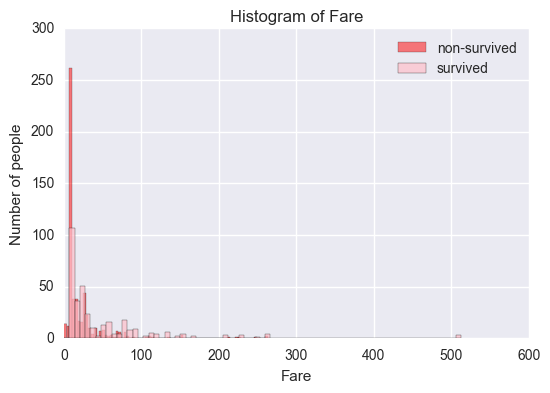

In [116]:
# draw graphs to show fare distributions for both survivals and non-survivals

%matplotlib inline
plt.hist(x3, bins=75, alpha=0.5, color= 'r', label = 'non-survived')
plt.hist(x2, bins=75, alpha=0.7, color= 'pink', label = 'survived')

plt.xlabel('Fare')
plt.ylabel('Number of people')
plt.title('Histogram of Fare')
plt.legend()

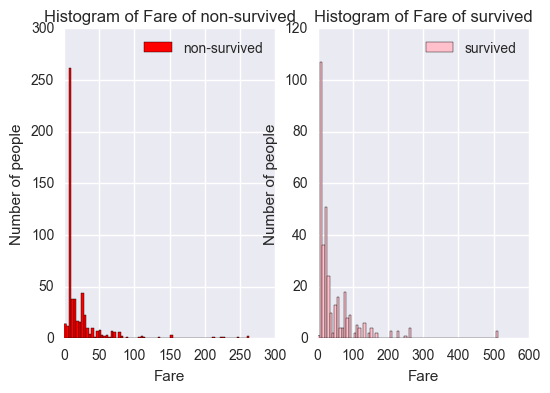

In [117]:
# draw graphs to show fare distributions for both survivals and non-survivals separately

fig, axs = plt.subplots(1,2)
axs[0].hist(x3, bins=75, color= 'r')
axs[0].legend(['non-survived'])
axs[0].set_xlabel('Fare')
axs[0].set_ylabel('Number of people')
axs[0].set_title('Histogram of Fare of non-survived')

axs[1].hist(x2, bins=75, color= 'pink')
axs[1].legend(['survived'])
axs[1].set_xlabel('Fare')
axs[1].set_ylabel('Number of people')
axs[1].set_title('Histogram of Fare of survived')

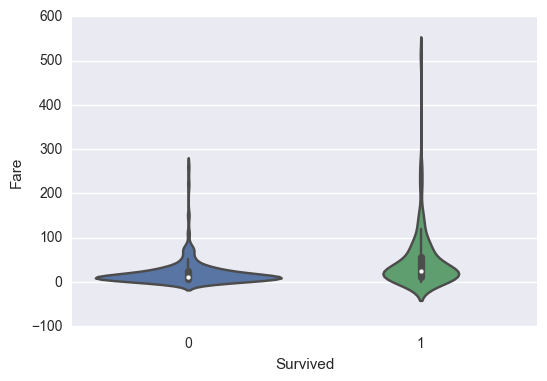

In [118]:
#draw violin plot for easier comparison
sns.violinplot( x=titanic_df["Survived"], y=titanic_df["Fare"])

In [119]:
# Mann-Whitney U test to compare fare distribution of survival vs non-survival
print(stats.mannwhitneyu(x2, x3))
print('pvalue = 2.28e-22 (more than .05). So it is true that there is significant difference.')

MannwhitneyuResult(statistic=57806.5, pvalue=2.2767385896251186e-22)
pvalue = 2.28e-22 (more than .05). So it is true that there is significant difference.


### Answer 3. Fare affects the survival rate.

## 3. Conclusion

### - Finding 1. There might be a positive correlation between survived and gender.

### - Finding 2. Age doesn't matter to survive or not.

### - Finding 3. There might be a negative correlation between for fare.

### Conclusion: According to the data, chances to survive were higher for passengers who is female and paid higher fare. 

As I mentioned earlier, there seems to be a significant difference in survival rate between those below 10 years old and those above 10. However, information we have is not enough to investigate further on this topic, so we would like to leave it as a next question to ask.

Also, I have replaced missing data of age to mean number of age. So if missing values didn't follow the normal distribution actually, result might change.